## PROBLEM 1 


In [456]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### (a)  Multiple Linear Regression Using Package

In [457]:

train = pd.read_csv("train.csv")
train1 = train.iloc[:,1:].drop('zipcode',axis=1)

train_X = train1.iloc[:,1:]
train_Y = train1["price"]


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_X,train_Y)

print('Intercept:', regr.intercept_)
print('Coefficients:', regr.coef_)
train_predictions = regr.predict(train_X)
print("MSE before feature standardization on train set:",mean_squared_error(train_Y, train_predictions))
train_X.columns

Intercept: -23088898.608546782
Coefficients: [-1.47042805e+04  2.56877840e+04  8.30842101e+01  3.75929764e-01
  1.55555810e+04  7.15535170e+05  6.30278980e+04  1.88164028e+04
  7.95346027e+04  4.20104953e+01  4.10737153e+01 -2.40066933e+03
  4.36829418e+01  5.53505032e+05 -7.42402712e+03  6.80157923e+01
 -5.15527568e-01]
MSE before feature standardization on train set: 31486167775.794907


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


### (b) Feauture standardization-
#### Each feature with mean 0 and variance 1 is done by calculating Z score.

In [458]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(train1)
scaled_train = pd.DataFrame(scaled_train, columns = train1.columns)

scaled_train_X = scaled_train.iloc[:,1:]
scaled_train_Y = scaled_train['price']

regr1 =  linear_model.LinearRegression()
regr1.fit(scaled_train_X, scaled_train_Y)

print('Intercept:', regr1.intercept_)
print('Coefficients:', regr1.coef_)

scaled_train_predictions = regr1.predict(scaled_train_X)

print("MSE after feature standardization on train set:",mean_squared_error(scaled_train_Y, scaled_train_predictions))


Intercept: -0.0031091130772896883
Coefficients: [-4.62479478e-02  6.44242143e-02  1.77809151e+13  3.25581346e-02
  2.23980581e-02  1.89213721e-01  1.40632305e-01  4.08253237e-02
  2.57472292e-01 -1.58214193e+13 -9.02930361e+12 -1.97479292e-01
  4.61393144e-02  2.31499991e-01 -7.43523368e-03  1.37479403e-01
 -4.31084366e-02]
MSE after feature standardization on train set: 0.27398167971733794


### (c) Evaluate both models on test set

In [459]:
test = pd.read_csv("test.csv")
test1 = test.iloc[:,3:].drop('zipcode', axis=1)

test_X = test1.iloc[:,1:]
test_Y = test1['price']


regr2 =  linear_model.LinearRegression()
regr2.fit(test_X, test_Y)
print("Intercept", regr2.intercept_)
print("Coefficient", regr2.coef_)

test_predictions = regr2.predict(test_X)
print("MSE before feature scaling on test set:", mean_squared_error(test_Y, test_predictions))

#test.columns
#train.columns

Intercept -31945368.647519786
Coefficient [-5.09706680e+04  4.53522145e+04  1.29557363e+02  4.60107448e-01
 -4.08290867e+03  6.67916885e+05  6.41825495e+04  3.74395531e+04
  8.69134817e+04  7.58952052e+01  5.36621586e+01 -2.59297980e+03
 -5.13466279e+00  5.67370348e+05 -7.67745545e+04  3.41095820e+01
 -8.48109171e-01]
MSE before feature scaling on test set: 54185036855.79503


In [460]:
scaled_test = scaler.fit_transform(test1)
scaled_test = pd.DataFrame(scaled_test, columns=test1.columns)

scaled_test_X = scaled_test.iloc[:,1:]
scaled_test_Y = scaled_test['price']

regr.fit(scaled_test_X, scaled_test_Y)

print('Intercept:', regr.intercept_)
print('coefficient:', regr.coef_)

scaled_test_predictions = regr.predict(scaled_test_X)

print('MSE after feature scaling on test set:', mean_squared_error(scaled_test_Y, scaled_test_predictions))



Intercept: -0.0006716979966518891
coefficient: [-1.14877493e-01  8.99392434e-02 -2.65511207e+12  6.58696372e-02
 -5.08052761e-03  1.85143237e-01  1.26062547e-01  6.06934296e-02
  2.56725377e-01  2.42803426e+12  1.27810802e+12 -1.78592744e-01
 -5.35908222e-03  1.90182956e-01 -2.52069046e-02  5.81678715e-02
 -5.85619912e-02]
MSE after feature scaling on test set: 0.3249640552345668


In [461]:
scaled_test_X.columns
#max(abs(regr.coef_))

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### (d)

In [462]:
print("MSE before feature standardization on train set:",mean_squared_error(train_Y, train_predictions))
print("MSE after feature standardization on train set:",mean_squared_error(scaled_train_Y, scaled_train_predictions))
print("MSE before feature scaling on test set:", mean_squared_error(test_Y, test_predictions))
print('MSE after feature scaling on test set:', mean_squared_error(scaled_test_Y, scaled_test_predictions))


MSE before feature standardization on train set: 31486167775.794907
MSE after feature standardization on train set: 0.27398167971733794
MSE before feature scaling on test set: 54185036855.79503
MSE after feature scaling on test set: 0.3249640552345668


## Problem 2 

### (a) SIMPLE LINEAR REGRESSION

In [463]:
scaled_train['new dimension'] = 1
scaled_test['new dimension'] = 1

X_train = scaled_train[['sqft_living','new dimension']]
Y_train = scaled_train['price']
X_test = scaled_test[['sqft_living','new dimension']]
Y_test = scaled_test['price']


X_train_matrix = X_train.as_matrix()
Y_train_matrix = Y_train.as_matrix()
X_test_matrix = X_test.as_matrix()
Y_test_matrix = Y_test.as_matrix()

Xt_train = X_train_matrix.transpose()
XtX_train = np.dot(Xt_train,X_train_matrix)
XtXi_train = np.linalg.inv(XtX_train)
XtXiXt_train = np.dot(XtXi_train, Xt_train)

b = np.dot(XtXiXt_train,Y_train_matrix)

predicted = np.dot(X_test_matrix[0,0],b)
print("predicted point for single dimentional point(sqft_living) in test set   :",predicted[0])
#print(Y_test_matrix[0])
#print(b)

predicted point for single dimentional point(sqft_living) in test set   : -0.20095624192656444


### (b) MULTIPLE LINEAR REGRESSIOIN 

In [464]:
X_train = scaled_train.iloc[:,1:]
Y_train = scaled_train['price']
X_test = scaled_test.iloc[:,1:]
Y_test = scaled_test['price']

X_train_matrix = X_train.as_matrix()
Y_train_matrix = Y_train.as_matrix()
X_test_matrix = X_test.as_matrix()
Y_test_matrix = Y_test.as_matrix()

Xt_train = X_train_matrix.transpose()
XtX_train = np.dot(Xt_train,X_train_matrix)
XtXi_train = np.linalg.inv(XtX_train)
XtXiXt_train = np.dot(XtXi_train, Xt_train)

b = np.dot(XtXiXt_train,Y_train_matrix)
predicted = np.dot(X_test_matrix,b)


print("predicted point for multi dimentional point in test set(all features)  with coefficients:",predicted[0])


predicted point for multi dimentional point in test set(all features)  with coefficients: 0.22909808264272552


### (c)

In [465]:
predicted = np.dot(X_train_matrix,b)
print("TRAIN MSE for MLR ", mean_squared_error(Y_train_matrix, predicted))


Xt_test = X_test_matrix.transpose()
XtX_test = np.dot(Xt_test,X_test_matrix)
XtXi_test = np.linalg.inv(XtX_test)
XtXiXt_test = np.dot(XtXi_test, Xt_test)

b = np.dot(XtXiXt_test,Y_test_matrix)
predicted = np.dot(X_test_matrix,b)

print("TEST MSE for MLR ", mean_squared_error(Y_test_matrix, predicted))

TRAIN MSE for MLR  0.30635267739647615
TEST MSE for MLR  0.36590860452327756


## PROBLEM 3 

### (a) Gradient Descent for Linear Regression

In [466]:

scaled_train_X = scaled_train.iloc[:, 1:-1]
scaled_train_Y = scaled_train['price']


scaled_test_X = scaled_test.iloc[:, 1:-1]
scaled_test_Y = scaled_test['price']

theta = np.random.rand(len(scaled_train_X.columns))

def GD(x,y,theta, Learning_rate, iterations):
    cost_list = []
    theta_list = []
    
    
    for i in range(iterations):
       
        prediction = np.dot(x, theta)
        
        error = prediction - y
        cost = 1/len(x) * np.dot(error.T, error)
        cost_list.append(cost)
        d_theta = (2/len(x)) * np.dot(x.T, error)
        
        theta = theta - Learning_rate * d_theta
        theta_list.append(theta)
        print("##########################################################################################################")
        print("theta {}, cost {}, iteration {}".format(theta, cost, i))
    
    #print(theta1, theta0, cost)
    return cost_list,theta_list

GD(scaled_train_X,scaled_train_Y,theta, 0.1, 5)


##########################################################################################################
theta [ 0.40428385 -0.43348237  0.12513354  0.35233413  0.26840911  0.17814775
  0.07774097  0.71033104 -0.24933424 -0.37443502  0.49485765  0.57181179
  0.08480316  0.47741319  0.42446     0.12638361  0.30944021], cost 11.872409006165759, iteration 0
##########################################################################################################
theta [ 0.37727311 -0.39151844  0.1696211   0.24111412  0.32151998  0.19483584
  0.10920143  0.61241984 -0.1664497  -0.29904557  0.4503649   0.5275781
  0.13536284  0.48157956  0.33437853  0.16730805  0.19891716], cost 1.9440616999574638, iteration 1
##########################################################################################################
theta [ 0.33771377 -0.37691462  0.18486684  0.16497583  0.34040193  0.20455358
  0.12628234  0.53528579 -0.11935076 -0.25598446  0.40493452  0.47620467
  0.16806253  0.47426732

([11.872409006165759,
  1.9440616999574638,
  1.3412771158849228,
  1.0255146077197843,
  0.8391933211015935],
 [array([ 0.40428385, -0.43348237,  0.12513354,  0.35233413,  0.26840911,
          0.17814775,  0.07774097,  0.71033104, -0.24933424, -0.37443502,
          0.49485765,  0.57181179,  0.08480316,  0.47741319,  0.42446   ,
          0.12638361,  0.30944021]),
  array([ 0.37727311, -0.39151844,  0.1696211 ,  0.24111412,  0.32151998,
          0.19483584,  0.10920143,  0.61241984, -0.1664497 , -0.29904557,
          0.4503649 ,  0.5275781 ,  0.13536284,  0.48157956,  0.33437853,
          0.16730805,  0.19891716]),
  array([ 0.33771377, -0.37691462,  0.18486684,  0.16497583,  0.34040193,
          0.20455358,  0.12628234,  0.53528579, -0.11935076, -0.25598446,
          0.40493452,  0.47620467,  0.16806253,  0.47426732,  0.26006148,
          0.18324789,  0.12221274]),
  array([ 0.30182888, -0.36470907,  0.19751927,  0.11710631,  0.3460115 ,
          0.2111318 ,  0.13828347,  0.

### (b)

In [467]:
#FOR TRAIN SET

#GD(scaled_train_X,scaled_train_Y, 0.001, 50)
cost_list, theta_list = GD(scaled_train_X,scaled_train_Y, theta,0.01, 100) 
#cost_list, theta_list = GD(scaled_train_X,scaled_train_Y,theta, 0.0001, 10)

##########################################################################################################
theta [ 0.73461696 -0.02467148  0.58279677  0.70915691  0.47549722  0.22013176
  0.18603068  0.75551074  0.12726633  0.04206233  0.6663096   0.91523519
  0.01203376  0.50871436  0.77380487  0.56391182  0.68052381], cost 11.872409006165759, iteration 0
##########################################################################################################
theta [ 0.70131355 -0.06513293  0.53747532  0.67236243  0.45531952  0.21610024
  0.17551631  0.75001366  0.09043512  0.00116649  0.64871948  0.88045051
  0.01981629  0.5056259   0.73796956  0.52056824  0.64231022], cost 10.004764616204374, iteration 1
##########################################################################################################
theta [ 0.67105781 -0.10115596  0.49710165  0.63817028  0.43765647  0.21263178
  0.1663536   0.74410795  0.05808009 -0.0349182   0.6324425   0.84869483
  0.02730831  0.5028764

##########################################################################################################
theta [ 0.33511869 -0.36464611  0.19787789  0.18364656  0.33327899  0.20468136
  0.12806792  0.52592545 -0.1044416  -0.23822297  0.39943425  0.47173778
  0.1610376   0.46484467  0.26553246  0.19748486  0.14051206], cost 1.0482336799133078, iteration 33
##########################################################################################################
theta [ 0.33093356 -0.36445392  0.19791116  0.1778539   0.33335049  0.20517302
  0.12892243  0.51983237 -0.10173928 -0.23583379  0.39531337  0.46647008
  0.1631842   0.46368474  0.25921674  0.19767172  0.13459907], cost 1.0245065570315746, iteration 34
##########################################################################################################
theta [ 0.32685925 -0.36416209  0.19805135  0.17230744  0.33340184  0.20565645
  0.12977543  0.51383171 -0.09898569 -0.23337075  0.39127365  0.4613233
  0.16523972  0.462506

##########################################################################################################
theta [ 0.24133845 -0.34150043  0.21589408  0.08358713  0.3214693   0.21398693
  0.14729074  0.38308722 -0.02600566 -0.16352578  0.30402588  0.34907877
  0.19493398  0.42612253  0.13699622  0.21912759  0.03713479], cost 0.6524793022356787, iteration 62
##########################################################################################################
theta [ 0.23875659 -0.34048914  0.21663675  0.08177609  0.32055314  0.21411986
  0.14769053  0.37923883 -0.02364859 -0.16119868  0.30141075  0.34554971
  0.19533089  0.4246938   0.13394415  0.21995236  0.0352072 ], cost 0.6449574048590017, iteration 63
##########################################################################################################
theta [ 0.23620536 -0.33947558  0.21737333  0.08003274  0.31961115  0.21424211
  0.14807396  0.3754497  -0.02132083 -0.15889862  0.29883103  0.34205258
  0.19569184  0.42326

##########################################################################################################
theta [ 0.18688837 -0.31685526  0.23177572  0.05444585  0.29420422  0.21474109
  0.15303809  0.30503489  0.02317782 -0.11480624  0.24993287  0.27215877
  0.19654649  0.39255174  0.07822078  0.23581824  0.00519401], cost 0.5188391618543494, iteration 86
##########################################################################################################
theta [ 0.18492227 -0.3158159   0.2323478   0.05370897  0.2929095   0.21468579
  0.15313492  0.30234027  0.02493132 -0.11307372  0.24802364  0.26926668
  0.19633941  0.3912152   0.07630846  0.2363691   0.00434245], cost 0.514834745712396, iteration 87
##########################################################################################################
theta [ 0.18297764 -0.3147756   0.23291311  0.05299876  0.29160795  0.2146254
  0.15322286  0.29968336  0.0266645  -0.11136243  0.24613831  0.26639695
  0.19611644  0.3898855

In [468]:
#FOR TEST SET


#print(GD(scaled_test_X,scaled_test_Y,theta, 0.001, 50))

#cost_list, theta_list = GD(scaled_test_X,scaled_test_Y,theta, 0.0001, 10)
cost_list, theta_list = GD(scaled_test_X,scaled_test_Y, theta,0.01, 100) 

##########################################################################################################
theta [ 0.73508754 -0.02078138  0.5887608   0.71960162  0.47261945  0.22053317
  0.18678366  0.75515507  0.13187735  0.04837078  0.66804126  0.91708629
  0.00992625  0.51177319  0.77475199  0.5705401   0.6881863 ], cost 10.787215488330098, iteration 0
##########################################################################################################
theta [ 0.70205023 -0.05786843  0.54870831  0.69183783  0.44978956  0.2168353
  0.17685776  0.74910841  0.09905462  0.01311349  0.65181576  0.88386568
  0.01567663  0.51117308  0.73942613  0.53294415  0.6564363 ], cost 9.290013916499186, iteration 1
##########################################################################################################
theta [ 0.67188123 -0.09097513  0.51298657  0.66542312  0.42968115  0.2136387
  0.1681412   0.74248922  0.07017384 -0.01792979  0.63658146  0.85341883
  0.02120778  0.51040492  

##########################################################################################################
theta [ 0.35771857 -0.33887459  0.25192611  0.29844029  0.30006271  0.19902306
  0.12034953  0.54966762 -0.09434931 -0.19475753  0.43018189  0.52346226
  0.10252181  0.46630904  0.29230248  0.23855952  0.22248012], cost 1.5457799602808686, iteration 25
##########################################################################################################
theta [ 0.35128679 -0.34045364  0.25064063  0.28925304  0.29966974  0.19921805
  0.12083844  0.54190634 -0.09295384 -0.19316151  0.42447947  0.51624907
  0.10455048  0.4638193   0.28225389  0.23656443  0.2126274 ], cost 1.4939097418074967, iteration 26
##########################################################################################################
theta [ 0.34508593 -0.3417866   0.24962253  0.28042998  0.29936008  0.19941774
  0.12137971  0.53427198 -0.09136609 -0.19135046  0.41892404  0.50926763
  0.10648536  0.46131

##########################################################################################################
theta [ 0.23925347 -0.34055285  0.25949458  0.14975628  0.2945371   0.20209681
  0.1373369   0.39294258 -0.03675481 -0.12872696  0.32046554  0.38563809
  0.13093995  0.40343701  0.11595522  0.22711165  0.0633239 ], cost 0.8412396024694389, iteration 50
##########################################################################################################
theta [ 0.23562427 -0.33990823  0.26046164  0.14630562  0.29405515  0.20208715
  0.13795259  0.38813638 -0.03433662 -0.12592243  0.31714667  0.3812332
  0.13133953  0.40103449  0.11117445  0.22730751  0.05961581], cost 0.8271224900051243, iteration 51
##########################################################################################################
theta [ 0.2320491  -0.33924514  0.26143744  0.14298454  0.29354276  0.2020675
  0.13855398  0.38342531 -0.03194094 -0.12314135  0.31389054  0.37688157
  0.13169796  0.3986482

##########################################################################################################
theta [ 0.16465784 -0.32181403  0.28288706  0.09439243  0.27585231  0.19970943
  0.14812123  0.30005647  0.01434921 -0.06898383  0.25556592  0.29222392
  0.13158115  0.35091271  0.0284818   0.2318115   0.00335111], cost 0.614854515843088, iteration 74
##########################################################################################################
theta [ 0.16202935 -0.32093604  0.28380922  0.09300057  0.27482533  0.19954126
  0.14840047  0.297035    0.01616597 -0.06684715  0.25342253  0.28880534
  0.1313032   0.34897517  0.02582272  0.23194114  0.00182097], cost 0.6089010929265743, iteration 75
##########################################################################################################
theta [ 1.59433635e-01 -3.20052545e-01  2.84724723e-01  9.16597800e-02
  2.73784894e-01  1.99369870e-01  1.48667679e-01  2.94068657e-01
  1.79597208e-02 -6.47372200e-02  2.51

##########################################################################################################
theta [ 0.10773603 -0.29845825  0.30384715  0.07129725  0.24747423  0.19497357
  0.15199067  0.23852947  0.05360626 -0.02286178  0.21148941  0.21570606
  0.12080333  0.30848649 -0.02248546  0.2325837  -0.02243352], cost 0.5071130310967769, iteration 99


### (c)

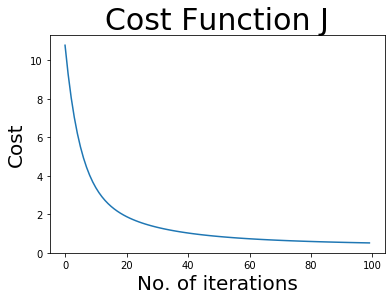

In [469]:
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()



In [470]:

print("TRAIN MSE USING PACKAGE:",mean_squared_error(scaled_train_Y, scaled_train_predictions))
print('TEST MSE USING PACKAGE:', mean_squared_error(scaled_test_Y, scaled_test_predictions))


TRAIN MSE USING PACKAGE: 0.27398167971733794
TEST MSE USING PACKAGE: 0.3249640552345668


In [471]:
#cost_list, theta_list = GD(scaled_test_X,scaled_test_Y, theta,0.01, 1000) 
#cost_list, theta_list = GD(scaled_train_X,scaled_train_Y, theta,0.01, 1000) 

## PROBLEM 4 

### (b)  Ridge Regression using closed form

In [472]:
X_train = scaled_train.iloc[:,1:-1]
Y_train = scaled_train['price']
X_test = scaled_test.iloc[:,1:-1]
Y_test = scaled_test['price']

X_train_matrix = X_train.as_matrix()
Y_train_matrix = Y_train.as_matrix()
X_test_matrix = X_test.as_matrix()
Y_test_matrix = Y_test.as_matrix()

Xt_train = X_train_matrix.transpose()
XtX_train = np.dot(Xt_train,X_train_matrix)

def ridge():
    TESTMSE = []
    for L in range(0,200):
        lambdaI = np.dot(L, np.eye(17))
    

        regsum = XtX_train + lambdaI

        regsumi = np.linalg.inv(regsum)

        regsumi_Xt = np.dot(regsumi,Xt_train)

        b = np.dot(regsumi_Xt, Y_train_matrix)

        predicted = np.dot(X_test_matrix,b)
        
        MSE =  mean_squared_error(Y_test_matrix,predicted)
        
        TESTMSE.append(MSE)
        print("lambda {}, MSE {}" .format(L, MSE))
    return TESTMSE 

#print("predicted point for multi dimentional point in test set  with coefficients:",b)

#print("TEST MSE for ridge regression: ", mean_squared_error(Y_test_matrix,predicted))
ridge()

lambda 0, MSE 0.350857064704416
lambda 1, MSE 0.33997262053450994
lambda 2, MSE 0.3399641407219275
lambda 3, MSE 0.33995613936516317
lambda 4, MSE 0.3399486087360487
lambda 5, MSE 0.33994154132264
lambda 6, MSE 0.3399349298216422
lambda 7, MSE 0.33992876713110104
lambda 8, MSE 0.3399230463434327
lambda 9, MSE 0.33991776073869506
lambda 10, MSE 0.3399129037781477
lambda 11, MSE 0.33990846909807254
lambda 12, MSE 0.33990445050381735
lambda 13, MSE 0.3399008419640953
lambda 14, MSE 0.33989763760549546
lambda 15, MSE 0.3398948317072031
lambda 16, MSE 0.3398924186959401
lambda 17, MSE 0.33989039314107916
lambda 18, MSE 0.33988874974996053
lambda 19, MSE 0.3398874833633823
lambda 20, MSE 0.3398865889512565
lambda 21, MSE 0.33988606160843754
lambda 22, MSE 0.3398858965507001
lambda 23, MSE 0.33988608911086793
lambda 24, MSE 0.33988663473508973
lambda 25, MSE 0.3398875289792516
lambda 26, MSE 0.3398887675055159
lambda 27, MSE 0.3398903460789957
lambda 28, MSE 0.33989226056454014
lambda 29, MSE

[0.350857064704416,
 0.33997262053450994,
 0.3399641407219275,
 0.33995613936516317,
 0.3399486087360487,
 0.33994154132264,
 0.3399349298216422,
 0.33992876713110104,
 0.3399230463434327,
 0.33991776073869506,
 0.3399129037781477,
 0.33990846909807254,
 0.33990445050381735,
 0.3399008419640953,
 0.33989763760549546,
 0.3398948317072031,
 0.3398924186959401,
 0.33989039314107916,
 0.33988874974996053,
 0.3398874833633823,
 0.3398865889512565,
 0.33988606160843754,
 0.3398858965507001,
 0.33988608911086793,
 0.33988663473508973,
 0.3398875289792516,
 0.3398887675055159,
 0.3398903460789957,
 0.33989226056454014,
 0.3398945069236472,
 0.33989708121147627,
 0.3398999795739776,
 0.3399031982451169,
 0.33990673354420337,
 0.33991058187330986,
 0.3399147397147856,
 0.3399192036288517,
 0.33992397025128707,
 0.3399290362911885,
 0.33993439852881274,
 0.3399400538134888,
 0.33994599906160555,
 0.3399522312546646,
 0.3399587474374019,
 0.3399655447159699,
 0.3399726202561844,
 0.339979971281826

In [473]:
#TESTMSE = ridge()

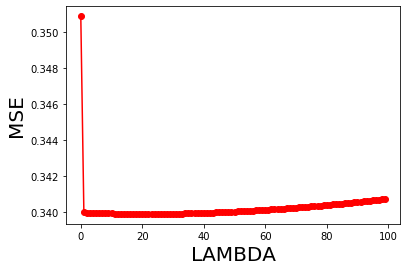

In [474]:
#plt.title('Cost Function J', size = 30)
plt.xlabel('LAMBDA', size=20)
plt.ylabel('MSE', size=20)
plt.plot(TESTMSE[:100],  '-ro')
plt.show()


## PROBLEM 6 

### (a)

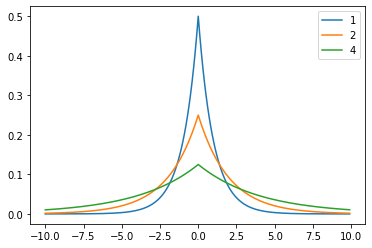

In [475]:
import math
np.random.seed(10)
x = np.arange(-10,10, 0.1)
list =[1,2,4]


for b in list:
    pdf_list = []
    for i in range(len(x)):
    
        pdf = 1/(2*b) * math.exp(-abs(x[i])/b)
        pdf_list.append(pdf)
    plt.plot(x, pdf_list, label = b)
plt.legend()
plt.show()